In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
# Importar a pandas archivo de Excel E-Commerce_train.xlsx

archivo = './E-Commerce_train.xlsx'
df = pd.read_excel(archivo, sheet_name = 'Sheet1', index_col=0)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
8995,D,Ship,3,1,217,3,low,F,1,4177,1
8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8997,A,Ship,4,5,260,3,medium,F,6,4221,0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 1 to 8999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      8999 non-null   object
 1   Mode_of_Shipment     8999 non-null   object
 2   Customer_care_calls  8999 non-null   int64 
 3   Customer_rating      8999 non-null   int64 
 4   Cost_of_the_Product  8999 non-null   int64 
 5   Prior_purchases      8999 non-null   int64 
 6   Product_importance   8999 non-null   object
 7   Gender               8999 non-null   object
 8   Discount_offered     8999 non-null   int64 
 9   Weight_in_gms        8999 non-null   int64 
 10  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 843.7+ KB


In [176]:
df.shape

(8999, 11)

In [177]:
# Descartamos columnas que no son relevantes para el resultado: llegada a tiempo del producto
# Descartamos Customer_care_calls, Customer_rating, Prior_purchases, Gender, Discount_offered.
df1 = df[['Warehouse_block', 'Mode_of_Shipment', 'Cost_of_the_Product', \
    'Product_importance', 'Weight_in_gms', 'Reached.on.Time_Y.N']]
df1.shape

(8999, 6)

In [178]:
df1

,Warehouse_block,Mode_of_Shipment,Cost_of_the_Product,Product_importance,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,
1,D,Flight,177,low,1233,1
2,F,Flight,216,low,3088,1
3,A,Flight,183,low,3374,1
4,B,Flight,176,medium,1177,1
5,C,Flight,184,medium,2484,1
...,...,...,...,...,...,...
8995,D,Ship,217,low,4177,1
8996,F,Ship,232,medium,4526,0
8997,A,Ship,260,medium,4221,0


In [18]:
df1[df1.duplicated()]

,Warehouse_block,Mode_of_Shipment,Cost_of_the_Product,Product_importance,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,
1664,F,Ship,224,low,2627,1


In [81]:
# Hay valores nulos?
df1.isnull().values.any()

False

In [119]:
df1.describe()

,Cost_of_the_Product,Weight_in_gms,Reached.on.Time_Y.N
count,8999.000000,8999.000000,8999.000000
mean,208.561507,3584.364596,0.635515
std,48.289172,1614.750194,0.481312
min,96.000000,1001.000000,0.000000
25%,168.000000,1857.000000,0.000000
50%,211.000000,4046.000000,1.000000
75%,249.500000,4999.500000,1.000000
max,310.000000,7846.000000,1.000000


# **EDA**

## Pairplot

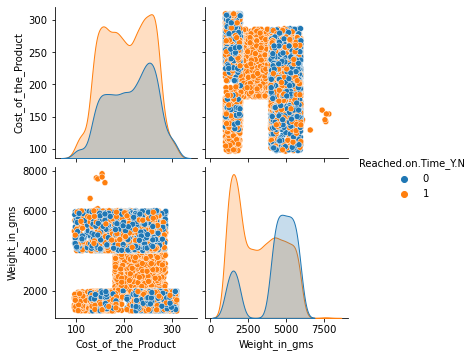

In [120]:
sns.pairplot(df1, hue="Reached.on.Time_Y.N")
plt.show() 

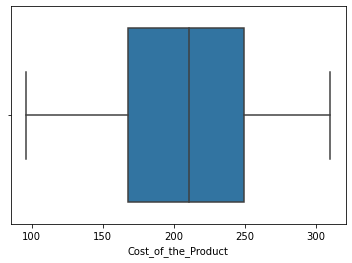

In [57]:
# Valores Atipicos
sns.boxplot(x='Cost_of_the_Product', data = df1)
plt.show()

## Codificación de variables categóricas
	Warehouse_block, Mode_of_Shipment, Product_importance

In [81]:
# Buscamos columnas "dummizables"
print(df1["Warehouse_block"].unique())

['D' 'F' 'A' 'B' 'C']


In [82]:
print(df1["Mode_of_Shipment"].unique())

['Flight' 'Ship' 'Road']


In [86]:
# Warehouse_block
wb = pd.get_dummies(df1["Warehouse_block"], prefix = "WB")
wb

,WB_A,WB_B,WB_C,WB_D,WB_F
ID,,,,,
1,0,0,0,1,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,1,0,0,0
5,0,0,1,0,0
...,...,...,...,...,...
8995,0,0,0,1,0
8996,0,0,0,0,1
8997,1,0,0,0,0


In [179]:
# creo función para "dummizar" las columnas Warehouse_block, Mode_of_Shipment, 
def createdummies(df, varname, prefijo):
    dummy = pd.get_dummies(df[varname], prefix = prefijo)
    df = df.drop(varname, axis = 1)
    df = pd.concat([dummy, df], axis = 1)
    return df

In [180]:
df2 = createdummies(df1,"Warehouse_block","wb")
df2

,wb_A,wb_B,wb_C,wb_D,wb_F,Mode_of_Shipment,Cost_of_the_Product,Product_importance,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,
1,0,0,0,1,0,Flight,177,low,1233,1
2,0,0,0,0,1,Flight,216,low,3088,1
3,1,0,0,0,0,Flight,183,low,3374,1
4,0,1,0,0,0,Flight,176,medium,1177,1
5,0,0,1,0,0,Flight,184,medium,2484,1
...,...,...,...,...,...,...,...,...,...,...
8995,0,0,0,1,0,Ship,217,low,4177,1
8996,0,0,0,0,1,Ship,232,medium,4526,0
8997,1,0,0,0,0,Ship,260,medium,4221,0


In [181]:
df2 = createdummies(df2,"Mode_of_Shipment","MoS")
df2

,MoS_Flight,MoS_Road,MoS_Ship,wb_A,wb_B,wb_C,wb_D,wb_F,Cost_of_the_Product,Product_importance,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,177,low,1233,1
2,1,0,0,0,0,0,0,1,216,low,3088,1
3,1,0,0,1,0,0,0,0,183,low,3374,1
4,1,0,0,0,1,0,0,0,176,medium,1177,1
5,1,0,0,0,0,1,0,0,184,medium,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,1,0,0,0,1,0,217,low,4177,1
8996,0,0,1,0,0,0,0,1,232,medium,4526,0
8997,0,0,1,1,0,0,0,0,260,medium,4221,0


In [86]:
# Rango "Cost_of_the_Product"
print(min(df2["Cost_of_the_Product"]))
print(max(df2["Cost_of_the_Product"]))

96
310


In [87]:
# Rango "Weight_in_gms"
print(min(df2["Weight_in_gms"]))
print(max(df2["Weight_in_gms"]))

1001
7846


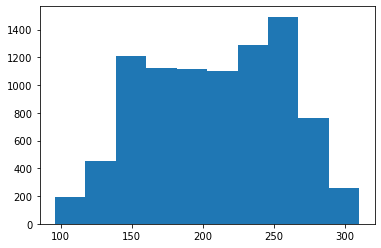

In [182]:
# probemos con el escalado de Cost_of_the_Product
from sklearn.preprocessing import StandardScaler
plt.hist(df2['Cost_of_the_Product'])
plt.show()

In [183]:
# Escalamos
scaler = StandardScaler()
scaler.fit(df2[['Cost_of_the_Product']])
df2['Cost_of_the_Product'] = scaler.transform(df2[['Cost_of_the_Product']])
df2

,MoS_Flight,MoS_Road,MoS_Ship,wb_A,wb_B,wb_C,wb_D,wb_F,Cost_of_the_Product,Product_importance,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,-0.653630,low,1233,1
2,1,0,0,0,0,0,0,1,0.154049,low,3088,1
3,1,0,0,1,0,0,0,0,-0.529372,low,3374,1
4,1,0,0,0,1,0,0,0,-0.674340,medium,1177,1
5,1,0,0,0,0,1,0,0,-0.508662,medium,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,1,0,0,0,1,0,0.174759,low,4177,1
8996,0,0,1,0,0,0,0,1,0.485405,medium,4526,0
8997,0,0,1,1,0,0,0,0,1.065277,medium,4221,0


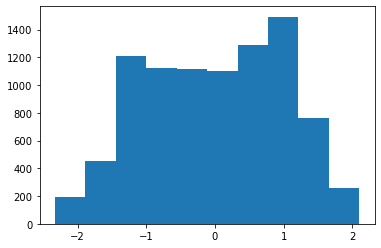

In [126]:
plt.hist(df2['Cost_of_the_Product'])
plt.show()

In [184]:
# Probemos el escalado de Weight_in_gms
scaler1 = StandardScaler()
scaler1.fit(df2[['Weight_in_gms']])
df2['Weight_in_gms'] = scaler1.transform(df2[['Weight_in_gms']])
df2

,MoS_Flight,MoS_Road,MoS_Ship,wb_A,wb_B,wb_C,wb_D,wb_F,Cost_of_the_Product,Product_importance,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,-0.653630,low,-1.456259,1
2,1,0,0,0,0,0,0,1,0.154049,low,-0.307411,1
3,1,0,0,1,0,0,0,0,-0.529372,low,-0.130284,1
4,1,0,0,0,1,0,0,0,-0.674340,medium,-1.490942,1
5,1,0,0,0,0,1,0,0,-0.508662,medium,-0.681484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,1,0,0,0,1,0,0.174759,low,0.367034,1
8996,0,0,1,0,0,0,0,1,0.485405,medium,0.583179,0
8997,0,0,1,1,0,0,0,0,1.065277,medium,0.394284,0


## Heatmap

In [142]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

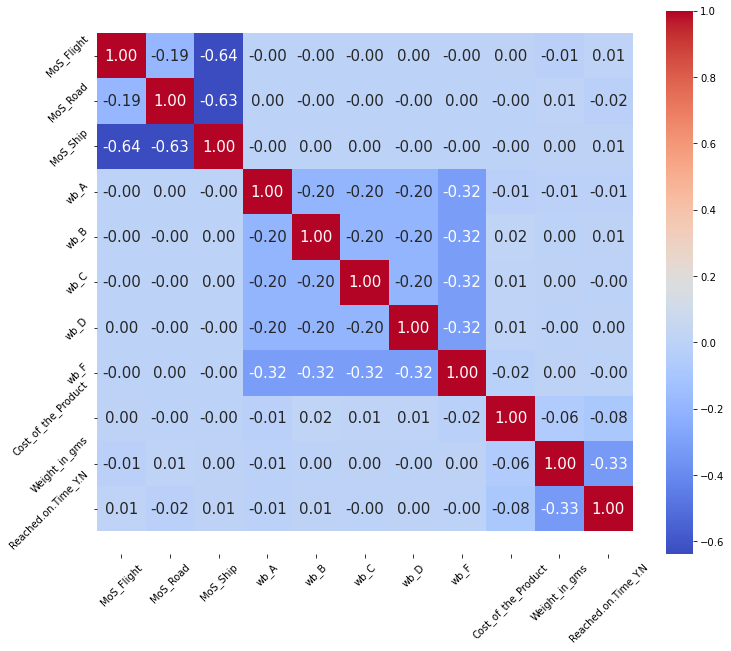

In [185]:
corr = df2.corr()
plot_corre_heatmap(corr)

# lets the game begins!!

In [186]:
df2.columns.tolist()

['MoS_Flight',
 'MoS_Road',
 'MoS_Ship',
 'wb_A',
 'wb_B',
 'wb_C',
 'wb_D',
 'wb_F',
 'Cost_of_the_Product',
 'Product_importance',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [192]:
# Asignamos parámetros

X = df2[['MoS_Flight',
 'MoS_Road',
 'MoS_Ship',
 'wb_A',
 'wb_B',
 'wb_C',
 'wb_D',
 'wb_F',
 'Cost_of_the_Product',
 'Weight_in_gms'
 ]]

y =df2['Reached.on.Time_Y.N'] 

In [193]:
# Definimos nuestras variables predictoras X y la etiqueta a predecir y y separamos nuestros datos 
# de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
# Estandarizamos
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [196]:
# Entrenamos
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [197]:
# predecimos

y_pred = classifier.predict(X_test)

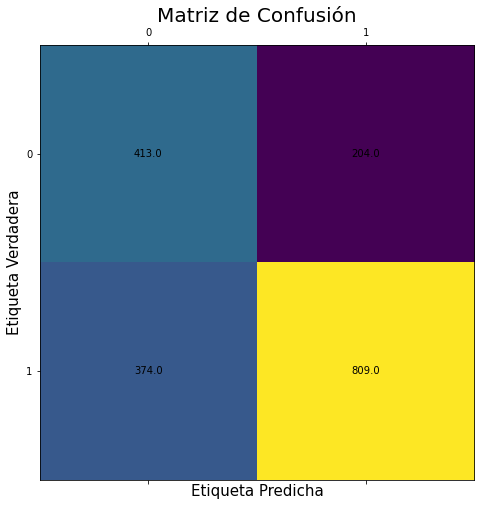

In [199]:
# Evaluamos

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [200]:
# reporte de clasificación

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.67      0.59       617
           1       0.80      0.68      0.74      1183

    accuracy                           0.68      1800
   macro avg       0.66      0.68      0.66      1800
weighted avg       0.70      0.68      0.69      1800



### Modificar archivo de prueba del modelo E-Commerce_test


In [201]:
archivo = './E-Commerce_test.xlsx'
dft = pd.read_excel(archivo, sheet_name = 'Sheet1', index_col=0)
dft = dft[['Warehouse_block', 'Mode_of_Shipment', 'Cost_of_the_Product', \
    'Product_importance', 'Weight_in_gms']]
dft = createdummies(dft,"Warehouse_block","wb")
dft = createdummies(dft,"Mode_of_Shipment","MoS")
scaler.fit(dft[['Cost_of_the_Product']])
dft['Cost_of_the_Product'] = scaler.transform(dft[['Cost_of_the_Product']])
scaler.fit(dft[['Weight_in_gms']])
dft['Weight_in_gms'] = scaler.transform(dft[['Weight_in_gms']])
dft

,MoS_Flight,MoS_Road,MoS_Ship,wb_A,wb_B,wb_C,wb_D,wb_F,Cost_of_the_Product,Product_importance,Weight_in_gms
ID,,,,,,,,,,,
9000,0,0,1,0,0,0,0,1,-0.616410,medium,0.814459
9001,0,0,1,0,0,0,1,0,-1.458294,high,0.344728
9002,0,0,1,0,0,0,0,1,-0.378956,low,1.102038
9003,0,0,1,1,0,0,0,0,-1.825269,medium,0.460111
9004,0,0,1,0,1,0,0,0,0.916250,low,0.964399
...,...,...,...,...,...,...,...,...,...,...,...
10995,0,0,1,1,0,0,0,0,0.743556,medium,-1.358489
10996,0,0,1,0,1,0,0,0,0.311821,medium,-1.528928
10997,0,0,1,0,0,1,0,0,0.527688,low,-1.582812


In [202]:
# Predecimos sobre la data propuesta
X_Send = dft[['MoS_Flight',
 'MoS_Road',
 'MoS_Ship',
 'wb_A',
 'wb_B',
 'wb_C',
 'wb_D',
 'wb_F',
 'Cost_of_the_Product',
 'Weight_in_gms']]

y_Send = classifier.predict(X_Send)

c:\Users\aagui\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [203]:
# Colocamos el título de la columna dentro del array de respuestas
title = np.array(['pred'])
y_Send = np.concatenate((title,y_Send))
y_Send

array(['pred', '0', '1', ..., '1', '1', '1'], dtype='<U21')

In [168]:
# Salvamos el array al archivo de salida
pd.DataFrame(y_Send).to_csv('VladT-Tempest.csv', index=None, header= None)